# Google Stocks (GOOGL)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preprocessing

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [4]:
import os

In [5]:
def preprocess_text(text):
    if isinstance(text, float) and pd.isna(text):
        text = ''
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

In [6]:
News_Data = 'DataSet/Google_News_2023.csv'

In [7]:
def preprocess_and_save(file, is_train=True):
    if os.path.exists(file):
        df = pd.read_csv(file)
        df['Processed_Text'] = df['Headlines'].apply(preprocess_text) + ' ' + df['Summary'].apply(preprocess_text)
        df['Publication_Date'] = pd.to_datetime(df['Publication_Date']).dt.date
        df_grouped = df.groupby('Publication_Date')['Processed_Text'].apply(lambda texts: ' '.join(texts)).reset_index()
        return df_grouped
    else:
        print(f"No such file or directory: '{file}'")
        return pd.DataFrame()

In [9]:
import re
df_train = preprocess_and_save(News_Data, is_train=True)

In [10]:
print(df_train)

    Publication_Date                                     Processed_Text
0         2023-01-01  think question life begin tell u underlying de...
1         2023-01-02  california town rattled earthquake second time...
2         2023-01-03  going miss greed cynicism well nostalgic day c...
3         2023-01-04  race test limit democrat redstate survival str...
4         2023-01-05  democrat unusual upclose view desantis jared m...
..               ...                                                ...
360       2023-12-27  michael flynns rhode island hall fame inclusio...
361       2023-12-28  herbert kohl former wisconsin senator milwauke...
362       2023-12-29  maine join colorado finding trump ineligible p...
363       2023-12-30  willie ruff jazz missionary professor dy 92 ma...
364       2023-12-31  defying u pressure israel deepens gaza assault...

[365 rows x 2 columns]


In [11]:
df_train.rename(columns={'Publication_Date': 'Date'}, inplace=True)
df_train.rename(columns={'Processed_Text': 'News_Headlines'}, inplace=True)

In [12]:
print(df_train)

           Date                                     News_Headlines
0    2023-01-01  think question life begin tell u underlying de...
1    2023-01-02  california town rattled earthquake second time...
2    2023-01-03  going miss greed cynicism well nostalgic day c...
3    2023-01-04  race test limit democrat redstate survival str...
4    2023-01-05  democrat unusual upclose view desantis jared m...
..          ...                                                ...
360  2023-12-27  michael flynns rhode island hall fame inclusio...
361  2023-12-28  herbert kohl former wisconsin senator milwauke...
362  2023-12-29  maine join colorado finding trump ineligible p...
363  2023-12-30  willie ruff jazz missionary professor dy 92 ma...
364  2023-12-31  defying u pressure israel deepens gaza assault...

[365 rows x 2 columns]


In [13]:
df_train['Date'] = pd.to_datetime(df_train['Date']).dt.strftime('%d-%m-%Y')

In [14]:
print(df_train)

           Date                                     News_Headlines
0    01-01-2023  think question life begin tell u underlying de...
1    02-01-2023  california town rattled earthquake second time...
2    03-01-2023  going miss greed cynicism well nostalgic day c...
3    04-01-2023  race test limit democrat redstate survival str...
4    05-01-2023  democrat unusual upclose view desantis jared m...
..          ...                                                ...
360  27-12-2023  michael flynns rhode island hall fame inclusio...
361  28-12-2023  herbert kohl former wisconsin senator milwauke...
362  29-12-2023  maine join colorado finding trump ineligible p...
363  30-12-2023  willie ruff jazz missionary professor dy 92 ma...
364  31-12-2023  defying u pressure israel deepens gaza assault...

[365 rows x 2 columns]


In [15]:
df_train.to_csv('Processed_News_Data.csv', index=False)

In [16]:
Financial_Data=pd.read_csv('DataSet/GOOGL_Financial_Data.csv')

In [17]:
print(Financial_Data)

           Date     Open    High      Low   Close    Volume
0    03-01-2023   89.585   91.05   88.520   89.12  28131224
1    04-01-2023   90.350   90.65   87.271   88.08  34854776
2    05-01-2023   87.470   87.57   85.900   86.20  27194375
3    06-01-2023   86.790   87.69   84.860   87.34  41381495
4    09-01-2023   88.360   90.05   87.860   88.02  29003901
..          ...      ...     ...      ...     ...       ...
245  22-12-2023  140.770  141.99  140.710  141.49  26532199
246  26-12-2023  141.590  142.68  141.190  141.52  16780333
247  27-12-2023  141.590  142.08  139.886  140.37  19567216
248  28-12-2023  140.780  141.14  139.750  140.23  16045712
249  29-12-2023  139.630  140.36  138.780  139.69  18733017

[250 rows x 6 columns]


In [18]:
Financial_Data.rename(columns={'Close': 'Stock_Price'}, inplace=True) # As the Closing Price of any Stock is its Stock Price on that day 

In [19]:
print(Financial_Data)

           Date     Open    High      Low  Stock_Price    Volume
0    03-01-2023   89.585   91.05   88.520        89.12  28131224
1    04-01-2023   90.350   90.65   87.271        88.08  34854776
2    05-01-2023   87.470   87.57   85.900        86.20  27194375
3    06-01-2023   86.790   87.69   84.860        87.34  41381495
4    09-01-2023   88.360   90.05   87.860        88.02  29003901
..          ...      ...     ...      ...          ...       ...
245  22-12-2023  140.770  141.99  140.710       141.49  26532199
246  26-12-2023  141.590  142.68  141.190       141.52  16780333
247  27-12-2023  141.590  142.08  139.886       140.37  19567216
248  28-12-2023  140.780  141.14  139.750       140.23  16045712
249  29-12-2023  139.630  140.36  138.780       139.69  18733017

[250 rows x 6 columns]


In [20]:
News_Data=pd.read_csv('Processed_News_Data.csv')

In [21]:
print(News_Data)

           Date                                     News_Headlines
0    01-01-2023  think question life begin tell u underlying de...
1    02-01-2023  california town rattled earthquake second time...
2    03-01-2023  going miss greed cynicism well nostalgic day c...
3    04-01-2023  race test limit democrat redstate survival str...
4    05-01-2023  democrat unusual upclose view desantis jared m...
..          ...                                                ...
360  27-12-2023  michael flynns rhode island hall fame inclusio...
361  28-12-2023  herbert kohl former wisconsin senator milwauke...
362  29-12-2023  maine join colorado finding trump ineligible p...
363  30-12-2023  willie ruff jazz missionary professor dy 92 ma...
364  31-12-2023  defying u pressure israel deepens gaza assault...

[365 rows x 2 columns]


In [24]:
data_merged = pd.merge(Financial_Data, News_Data, left_on='Date', right_on='Date', how='left')

In [25]:
print(data_merged)

           Date     Open    High      Low  Stock_Price    Volume  \
0    03-01-2023   89.585   91.05   88.520        89.12  28131224   
1    04-01-2023   90.350   90.65   87.271        88.08  34854776   
2    05-01-2023   87.470   87.57   85.900        86.20  27194375   
3    06-01-2023   86.790   87.69   84.860        87.34  41381495   
4    09-01-2023   88.360   90.05   87.860        88.02  29003901   
..          ...      ...     ...      ...          ...       ...   
245  22-12-2023  140.770  141.99  140.710       141.49  26532199   
246  26-12-2023  141.590  142.68  141.190       141.52  16780333   
247  27-12-2023  141.590  142.08  139.886       140.37  19567216   
248  28-12-2023  140.780  141.14  139.750       140.23  16045712   
249  29-12-2023  139.630  140.36  138.780       139.69  18733017   

                                        News_Headlines  
0    going miss greed cynicism well nostalgic day c...  
1    race test limit democrat redstate survival str...  
2    democra

In [26]:
# To Add the Sentiment Scores of News_Headlines
data_merged["Positive"]=""
data_merged["Negative"]=""
data_merged["Neutral"]=""

In [27]:
print(data_merged)

           Date     Open    High      Low  Stock_Price    Volume  \
0    03-01-2023   89.585   91.05   88.520        89.12  28131224   
1    04-01-2023   90.350   90.65   87.271        88.08  34854776   
2    05-01-2023   87.470   87.57   85.900        86.20  27194375   
3    06-01-2023   86.790   87.69   84.860        87.34  41381495   
4    09-01-2023   88.360   90.05   87.860        88.02  29003901   
..          ...      ...     ...      ...          ...       ...   
245  22-12-2023  140.770  141.99  140.710       141.49  26532199   
246  26-12-2023  141.590  142.68  141.190       141.52  16780333   
247  27-12-2023  141.590  142.08  139.886       140.37  19567216   
248  28-12-2023  140.780  141.14  139.750       140.23  16045712   
249  29-12-2023  139.630  140.36  138.780       139.69  18733017   

                                        News_Headlines Positive Negative  \
0    going miss greed cynicism well nostalgic day c...                     
1    race test limit democrat r

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [30]:
def get_sentiment_scores(text):
    scores = sentiment.polarity_scores(text)
    return scores['pos'], scores['neg'], scores['neu']

In [31]:
data_merged[['Positive', 'Negative', 'Neutral']] = data_merged['News_Headlines'].apply(lambda text: pd.Series(get_sentiment_scores(text)))

In [32]:
print(data_merged)

           Date     Open    High      Low  Stock_Price    Volume  \
0    03-01-2023   89.585   91.05   88.520        89.12  28131224   
1    04-01-2023   90.350   90.65   87.271        88.08  34854776   
2    05-01-2023   87.470   87.57   85.900        86.20  27194375   
3    06-01-2023   86.790   87.69   84.860        87.34  41381495   
4    09-01-2023   88.360   90.05   87.860        88.02  29003901   
..          ...      ...     ...      ...          ...       ...   
245  22-12-2023  140.770  141.99  140.710       141.49  26532199   
246  26-12-2023  141.590  142.68  141.190       141.52  16780333   
247  27-12-2023  141.590  142.08  139.886       140.37  19567216   
248  28-12-2023  140.780  141.14  139.750       140.23  16045712   
249  29-12-2023  139.630  140.36  138.780       139.69  18733017   

                                        News_Headlines  Positive  Negative  \
0    going miss greed cynicism well nostalgic day c...     0.114     0.144   
1    race test limit democr

In [33]:
merge_df=pd.DataFrame(data_merged)

In [35]:
def sentiment_catag(text):
    scores = sentiment.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [36]:
merge_df['Sentiment'] = merge_df['News_Headlines'].apply(sentiment_catag)

In [37]:
print(merge_df)

           Date     Open    High      Low  Stock_Price    Volume  \
0    03-01-2023   89.585   91.05   88.520        89.12  28131224   
1    04-01-2023   90.350   90.65   87.271        88.08  34854776   
2    05-01-2023   87.470   87.57   85.900        86.20  27194375   
3    06-01-2023   86.790   87.69   84.860        87.34  41381495   
4    09-01-2023   88.360   90.05   87.860        88.02  29003901   
..          ...      ...     ...      ...          ...       ...   
245  22-12-2023  140.770  141.99  140.710       141.49  26532199   
246  26-12-2023  141.590  142.68  141.190       141.52  16780333   
247  27-12-2023  141.590  142.08  139.886       140.37  19567216   
248  28-12-2023  140.780  141.14  139.750       140.23  16045712   
249  29-12-2023  139.630  140.36  138.780       139.69  18733017   

                                        News_Headlines  Positive  Negative  \
0    going miss greed cynicism well nostalgic day c...     0.114     0.144   
1    race test limit democr

In [38]:
sentiment_counts = merge_df['Sentiment'].value_counts(normalize=True) * 100

In [39]:
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['red', 'lightgreen', 'lightskyblue']
explode = (0, 0, 0)

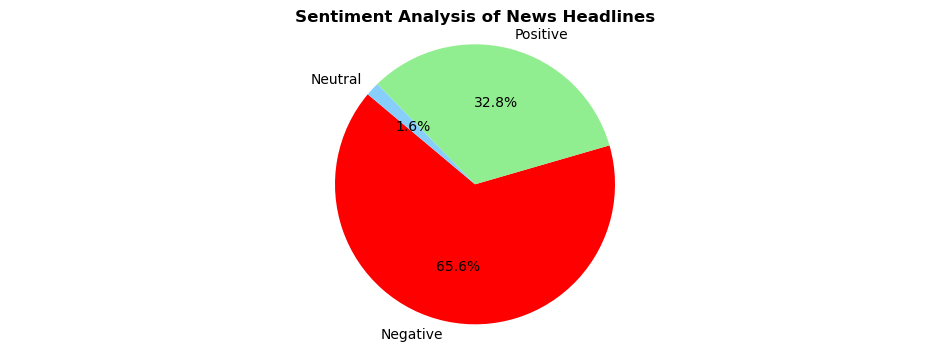

In [40]:
plt.figure(figsize=(12, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Sentiment Analysis of News Headlines',fontweight='bold')
plt.show()

### Splitting Data into Training (75%) and Testing Dataset (25%)

In [61]:
start_train='0' #Indexes
end_train='185'
start_test='186'
end_test='249'

In [62]:
train = merge_df.loc[start_train : end_train,:] #Training Dataset
test = merge_df.loc[start_test:end_test,:] #Testing Dataset

In [63]:
print(train)

           Date     Open      High      Low  Stock_Price    Volume  \
0    03-01-2023   89.585   91.0500   88.520       89.120  28131224   
1    04-01-2023   90.350   90.6500   87.271       88.080  34854776   
2    05-01-2023   87.470   87.5700   85.900       86.200  27194375   
3    06-01-2023   86.790   87.6900   84.860       87.340  41381495   
4    09-01-2023   88.360   90.0500   87.860       88.020  29003901   
..          ...      ...       ...      ...          ...       ...   
181  22-09-2023  130.760  132.0250  129.600      130.250  26397337   
182  25-09-2023  129.830  131.1700  128.960      131.110  20094643   
183  26-09-2023  129.770  130.3645  127.220      128.565  25718704   
184  27-09-2023  128.570  130.8950  128.570      130.540  22746452   
185  28-09-2023  129.840  133.3000  129.790      132.310  22513132   

                                        News_Headlines  Positive  Negative  \
0    going miss greed cynicism well nostalgic day c...     0.114     0.144   
1  

In [64]:
print(test)

           Date    Open    High      Low  Stock_Price    Volume  \
186  29-09-2023  133.28  134.05  130.360       130.86  30859790   
187  02-10-2023  131.21  134.42  131.170       134.17  22288038   
188  03-10-2023  133.94  134.26  131.840       132.43  22989401   
189  04-10-2023  132.79  135.57  132.530       135.24  26752295   
190  05-10-2023  135.07  135.49  133.450       135.07  19832615   
..          ...     ...     ...      ...          ...       ...   
245  22-12-2023  140.77  141.99  140.710       141.49  26532199   
246  26-12-2023  141.59  142.68  141.190       141.52  16780333   
247  27-12-2023  141.59  142.08  139.886       140.37  19567216   
248  28-12-2023  140.78  141.14  139.750       140.23  16045712   
249  29-12-2023  139.63  140.36  138.780       139.69  18733017   

                                        News_Headlines  Positive  Negative  \
186  saw x review blood gut little heart 10th movie...     0.121     0.144   
187  two people killed grizzly bear ban

### Creating Movement Column

In [55]:
merge_df['Movement'] = merge_df['Positive'] - merge_df['Negative']

In [56]:
threshold = 0.0 #Threshold for Classification

In [57]:
merge_df['Movement'] = merge_df['Movement'].apply(lambda x: 1 if x > threshold else 0)

In [58]:
print(merge_df[['Date','Stock_Price', 'Positive', 'Negative', 'Movement']])

           Date  Stock_Price  Positive  Negative  Movement
0    03-01-2023        89.12     0.114     0.144         0
1    04-01-2023        88.08     0.144     0.158         0
2    05-01-2023        86.20     0.148     0.137         1
3    06-01-2023        87.34     0.138     0.168         0
4    09-01-2023        88.02     0.148     0.147         1
..          ...          ...       ...       ...       ...
245  22-12-2023       141.49     0.153     0.134         1
246  26-12-2023       141.52     0.156     0.124         1
247  27-12-2023       140.37     0.168     0.152         1
248  28-12-2023       140.23     0.142     0.161         0
249  29-12-2023       139.69     0.137     0.135         1

[250 rows x 5 columns]


## Models

### Random Forest Classifier Model

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [60]:
rf=RandomForestClassifier(random_state=42)

In [65]:
X_train = train[['Open', 'High', 'Low', 'Volume', 'Positive', 'Negative','Neutral']]
y_train = train['Movement']

In [66]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
X_test = test[['Open', 'High', 'Low', 'Volume', 'Positive', 'Negative','Neutral']]

In [69]:
predictions_rf = rf.predict(X_test)
predictions_prob_rf = rf.predict_proba(X_test)[:, 1]

In [70]:
accuracy_rf = accuracy_score(test['Movement'], predictions_rf)
precision_rf = precision_score(test['Movement'], predictions_rf)

In [71]:
recall_rf = recall_score(test['Movement'], predictions_rf)
f1_rf = f1_score(test['Movement'], predictions_rf)
roc_auc_rf = roc_auc_score(test['Movement'], predictions_prob_rf)

In [72]:
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-score: {f1_rf}")
print(f"Random Forest ROC AUC: {roc_auc_rf}")

Random Forest Accuracy: 0.984375
Random Forest Precision: 1.0
Random Forest Recall: 0.9583333333333334
Random Forest F1-score: 0.9787234042553191
Random Forest ROC AUC: 0.9953124999999999


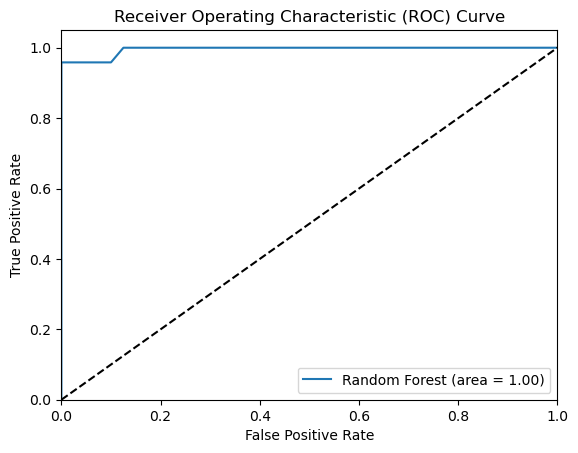

In [73]:
fpr_rf, tpr_rf, _ = roc_curve(test['Movement'], predictions_prob_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [77]:
matrix = confusion_matrix(test['Movement'], predictions_rf)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[40  0]
 [ 1 23]]


In [79]:
report = classification_report(test['Movement'], predictions_rf)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.96      0.98        24

    accuracy                           0.98        64
   macro avg       0.99      0.98      0.98        64
weighted avg       0.98      0.98      0.98        64



### Support Vector Machine (SVM) Model

In [81]:
from sklearn.svm import SVC

In [82]:
svm=SVC(probability=True, random_state=42)

In [84]:
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [86]:
predictions_svm = svm.predict(X_test)
predictions_prob_svm = svm.predict_proba(X_test)[:, 1]

In [87]:
accuracy_svm = accuracy_score(test['Movement'], predictions_svm)
precision_svm = precision_score(test['Movement'], predictions_svm)
recall_svm = recall_score(test['Movement'], predictions_svm)
f1_svm = f1_score(test['Movement'], predictions_svm)
roc_auc_svm = roc_auc_score(test['Movement'], predictions_prob_svm)

In [88]:
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1-score: {f1_svm}")
print(f"SVM ROC AUC: {roc_auc_svm}")

SVM Accuracy: 0.640625
SVM Precision: 0.6666666666666666
SVM Recall: 0.08333333333333333
SVM F1-score: 0.14814814814814814
SVM ROC AUC: 0.39166666666666666


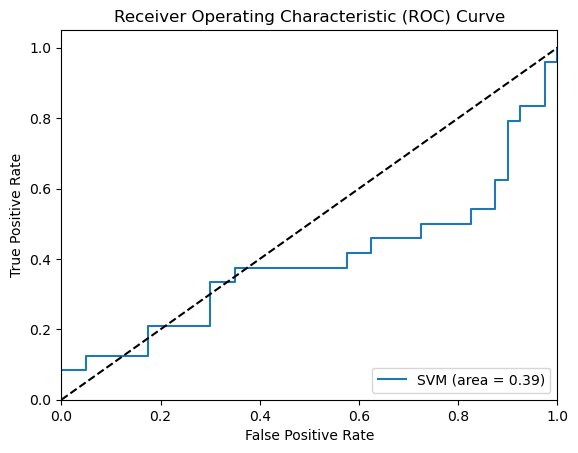

In [89]:
fpr_svm, tpr_svm, _ = roc_curve(test['Movement'], predictions_prob_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [91]:
matrix = confusion_matrix(test['Movement'], predictions_svm)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[39  1]
 [22  2]]


In [92]:
report = classification_report(test['Movement'], predictions_svm)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.97      0.77        40
           1       0.67      0.08      0.15        24

    accuracy                           0.64        64
   macro avg       0.65      0.53      0.46        64
weighted avg       0.65      0.64      0.54        64



### Neural Networks Model

In [93]:
from keras.models import Sequential
from keras.layers import Dense

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
nn = Sequential()
nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

E:\ANACONDA\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
nn.fit(X_train_scaled, y_train, epochs=50, batch_size=5, verbose=1)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 6.4427e-04
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016   
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9957 - loss: 0.0148
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9923 - loss: 0.0169   
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9852 - loss: 0.0541   
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9825 - loss: 0.0982   
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9969 - loss: 0.0141
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0023
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0014
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015   
Epoch 12/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

In [114]:
predictions_nn = (nn.predict(X_test_scaled) > 0.5).astype("int32")
predictions_prob_nn = nn.predict(X_test_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [115]:
accuracy_nn = accuracy_score(test['Movement'], predictions_nn)
precision_nn = precision_score(test['Movement'], predictions_nn)
recall_nn = recall_score(test['Movement'], predictions_nn)
f1_nn = f1_score(test['Movement'], predictions_nn)
roc_auc_nn = roc_auc_score(test['Movement'], predictions_prob_nn)

In [116]:
print(f"Neural Network Accuracy: {accuracy_nn}")
print(f"Neural Network Precision: {precision_nn}")
print(f"Neural Network Recall: {recall_nn}")
print(f"Neural Network F1-score: {f1_nn}")
print(f"Neural Network ROC AUC: {roc_auc_nn}")

Neural Network Accuracy: 0.96875
Neural Network Precision: 1.0
Neural Network Recall: 0.9166666666666666
Neural Network F1-score: 0.9565217391304348
Neural Network ROC AUC: 0.996875


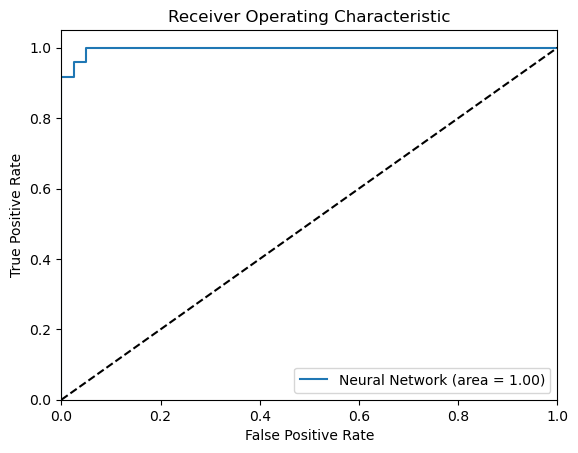

In [117]:
fpr_nn, tpr_nn, _ = roc_curve(test['Movement'], predictions_prob_nn)
plt.figure()
plt.plot(fpr_nn, tpr_nn, label='Neural Network (area = %0.2f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [118]:
matrix = confusion_matrix(test['Movement'], predictions_nn)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[40  0]
 [ 2 22]]


In [119]:
report = classification_report(test['Movement'], predictions_nn)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.92      0.96        24

    accuracy                           0.97        64
   macro avg       0.98      0.96      0.97        64
weighted avg       0.97      0.97      0.97        64



## Predicting Stock Prices

### Using Decision Tree Regressor

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [122]:
dt=DecisionTreeRegressor(random_state=42)

In [200]:
feature_importances = dt.feature_importances_

In [127]:
X_train = train[['Open', 'High', 'Low', 'Volume', 'Positive', 'Negative', 'Neutral','Movement']]
Y_train = train['Stock_Price']

In [203]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [204]:
X_test = test[['Open', 'High', 'Low', 'Volume', 'Positive', 'Negative','Neutral','Movement']]

In [206]:
predictions_dt = dt.predict(X_test)

In [207]:
mse_dt = mean_squared_error(test['Stock_Price'], predictions_dt)
mae_dt = mean_absolute_error(test['Stock_Price'], predictions_dt)

In [208]:
predictions_df_dt = pd.DataFrame({
    'Date': test.index,
    'Predicted_Price_DT': predictions_dt,
    'Actual_Price': test['Stock_Price'].values
})

In [209]:
print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree Mean Absolute Error: {mae_dt}")

Decision Tree Mean Squared Error: 1.806934765624994
Decision Tree Mean Absolute Error: 1.0372656249999983


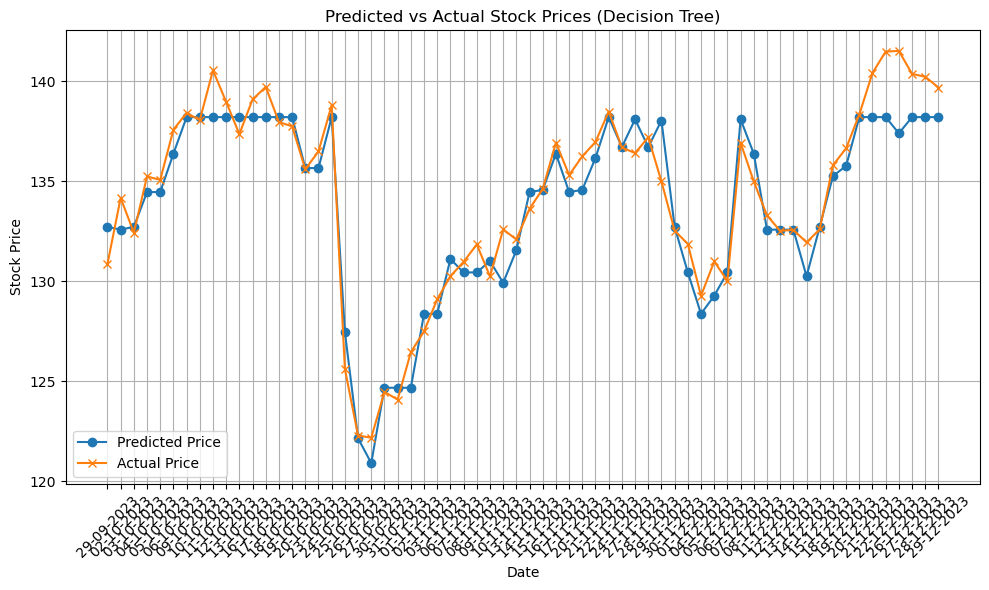

In [210]:
dates = test['Date']
plt.figure(figsize=(10, 6))
plt.plot(dates, predictions_dt, label='Predicted Price', marker='o')
plt.plot(dates, test['Stock_Price'], label='Actual Price', marker='x')
plt.title('Predicted vs Actual Stock Prices (Decision Tree)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('time_series_plot_decision_tree.png')
plt.show()


R-squared (Decision Tree): 0.91762773715161


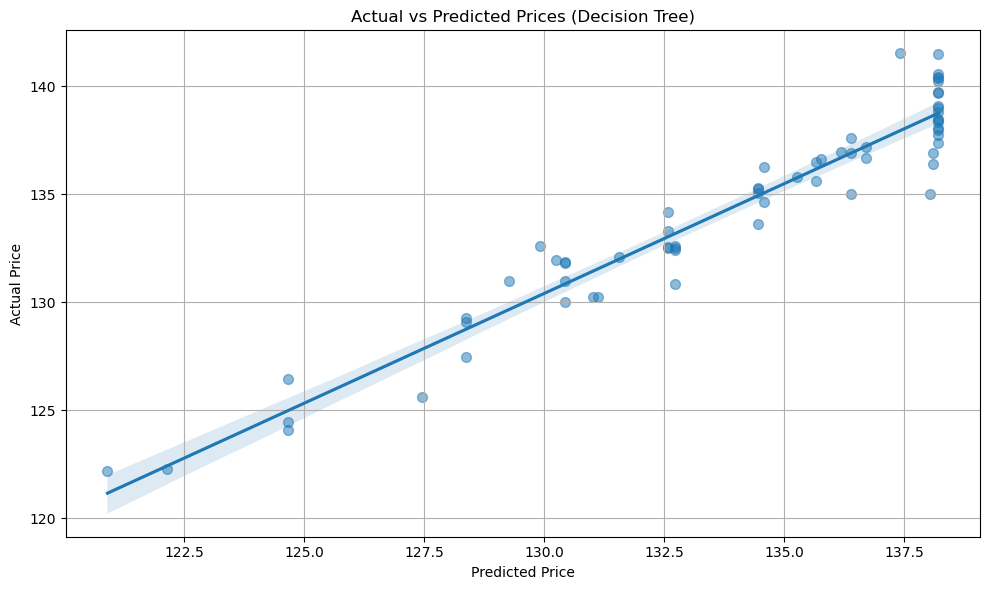

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
r2 = r2_score(test['Stock_Price'], predictions_dt)
print(f"R-squared (Decision Tree): {r2}")
plt.figure(figsize=(10, 6))
sns.regplot(x=predictions_df_dt['Predicted_Price_DT'], y=predictions_df_dt['Actual_Price'], scatter_kws={'s': 50, 'alpha': 0.5})
plt.title('Actual vs Predicted Prices (Decision Tree)')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_plot_decision_tree.png')
plt.show()

### Using Gradient Boosting Regressor

In [177]:
from sklearn.ensemble import GradientBoostingRegressor

In [178]:
gbm=GradientBoostingRegressor(n_estimators=100, random_state=42)

In [193]:
gbm.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=42)

In [194]:
predictions_gbm = gbm.predict(X_test)

In [195]:
mse_gbm = mean_squared_error(test['Stock_Price'], predictions_gbm)
mae_gbm = mean_absolute_error(test['Stock_Price'], predictions_gbm)
print(f"Gradient Boosting Mean Squared Error: {mse_gbm}")
print(f"Gradient Boosting Mean Absolute Error: {mae_gbm}")

Gradient Boosting Mean Squared Error: 1.8795789814192767
Gradient Boosting Mean Absolute Error: 1.0577908588233875


In [196]:
predictions_df_gbm = pd.DataFrame({
    'Date': test.index,
    'Predicted_Price_GBM': predictions_gbm,
    'Actual_Price': test['Stock_Price'].values
})

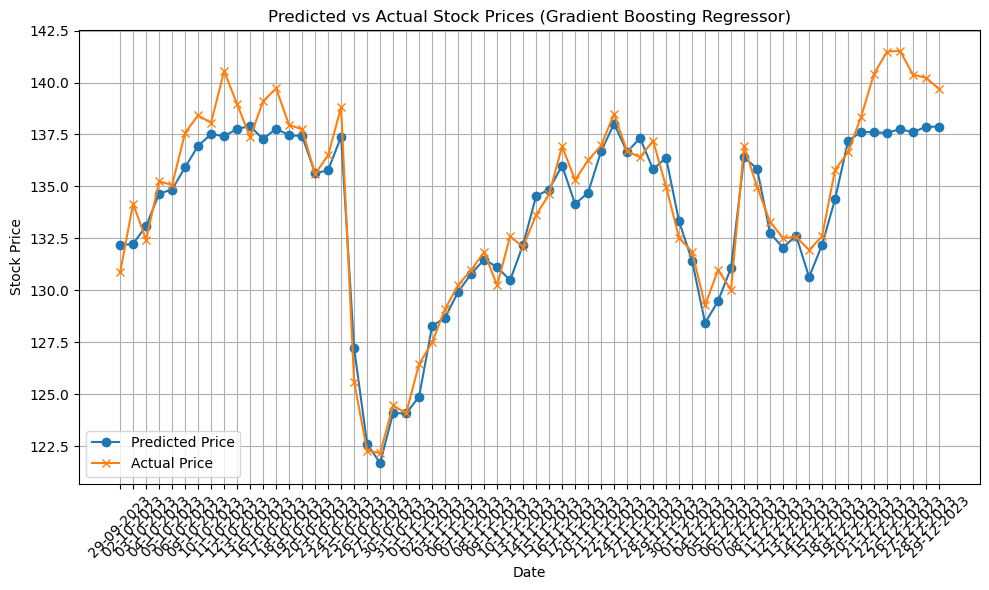

In [197]:
dates = test['Date']
plt.figure(figsize=(10, 6))
plt.plot(dates, predictions_gbm, label='Predicted Price', marker='o')
plt.plot(dates, test['Stock_Price'], label='Actual Price', marker='x')
plt.title('Predicted vs Actual Stock Prices (Gradient Boosting Regressor)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('time_series_plot_gbm.png')
plt.show()

R-squared (Decision Tree): 0.9143161242745662


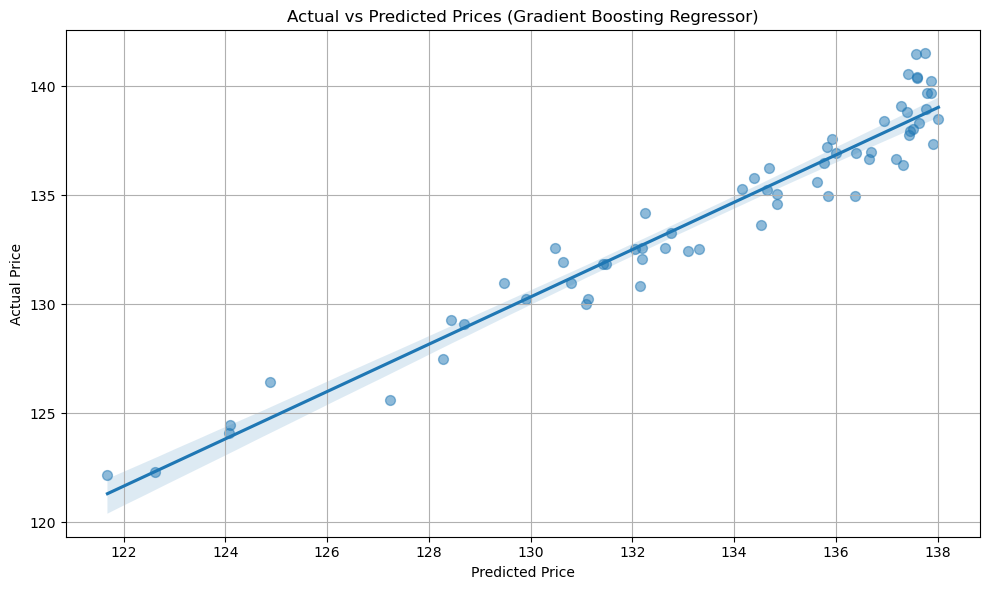

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
r2 = r2_score(test['Stock_Price'], predictions_gbm)
print(f"R-squared (Decision Tree): {r2}")
plt.figure(figsize=(10, 6))
sns.regplot(x=predictions_df_gbm['Predicted_Price_GBM'], y=predictions_df_gbm['Actual_Price'], scatter_kws={'s': 50, 'alpha': 0.5})
plt.title('Actual vs Predicted Prices (Gradient Boosting Regressor)')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_plot_decision_tree.png')
plt.show()